# 📌 Extracción

## ✅ Cargar los datos directamente desde la API utilizando Python.

In [1]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
df = pd.read_json('TelecomX_Data.json')

## ✅ Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.

In [3]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [4]:
type(df)

pandas.core.frame.DataFrame

# 🔧 Transformación

Ahora que has extraído los datos, es fundamental comprender la estructura del dataset y el significado de sus columnas. Esta etapa te ayudará a identificar qué variables son más relevantes para el análisis de evasión de clientes.

📌 Para facilitar este proceso, hemos creado un diccionario de datos con la descripción de cada columna. Aunque no es obligatorio utilizarlo, puede ayudarte a comprender mejor la información disponible.

🔗 Enlace al diccionario y a la API

¿Qué debes hacer?

- ✅ Explorar las columnas del dataset y verificar sus tipos de datos.
- ✅ Consultar el diccionario para comprender mejor el significado de las variables.
- ✅ Identificar las columnas más relevantes para el análisis de evasión.

📌 Tips:
- 🔗 [Documentación](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) de DataFrame.info()
- 🔗 [Documentación](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html) de DataFrame.dtypes

## ✅ Explorar las columnas del dataset y verificar sus tipos de datos.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


## ✅ Identificar las columnas más relevantes para el análisis de evasión.

In [6]:
df.dtypes

customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

## Comprobación de incoherencias en los datos

En este paso, verifica si hay problemas en los datos que puedan afectar el análisis. Presta atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías. Este proceso es esencial para asegurarte de que los datos estén listos para las siguientes etapas.

📌 Tips:

🔗 [Documentación](https://pandas.pydata.org/docs/reference/api/pandas.unique.html) de pandas.unique()

🔗 [Documentación](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.normalize.html) de pandas.Series.dt.normalize()

In [7]:
df.Churn.unique()

array(['No', 'Yes', ''], dtype=object)

## Normalize para desglosar todo

In [8]:
df = pd.json_normalize(
    df.to_dict(orient='records'),
    sep='_'
)

In [9]:
df.head(1)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

## Ver todas las columnas

In [11]:
pd.set_option('display.max_columns', None)

# Puedes volver a ocultarlas así:
# pd.reset_option('display.max_columns')

In [12]:
df.sample(10)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
3511,4836-WNFNO,No,Female,0,Yes,No,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.00,1849.2
4621,6339-DKLMK,No,Female,0,No,No,13,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,31.65,389.95
6146,8405-IGQFX,No,Female,0,No,No,63,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,No,One year,Yes,Credit card (automatic),90.05,5817
6265,8623-ULFNQ,No,Female,1,No,No,26,Yes,Yes,DSL,No,No,No,Yes,No,Yes,Month-to-month,Yes,Electronic check,66.05,1652.4
1766,2511-ALLCS,No,Female,0,Yes,Yes,35,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),24.30,821.6
1086,1539-LNKHM,No,Female,0,No,No,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,266.6
1629,2316-ESMLS,No,Female,0,Yes,Yes,12,No,No phone service,DSL,Yes,No,No,Yes,No,No,One year,No,Credit card (automatic),33.15,444.75
484,0685-MLYYM,Yes,Female,1,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Electronic check,70.75,154.85
6976,9610-WCESF,No,Male,0,No,No,67,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,Two year,No,Electronic check,43.90,3097.2
5407,7396-VJUZB,No,Male,0,Yes,Yes,4,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,45.25,155.35


In [13]:
df.isnull().sum()

customerID                   0
Churn                        0
customer_gender              0
customer_SeniorCitizen       0
customer_Partner             0
customer_Dependents          0
customer_tenure              0
phone_PhoneService           0
phone_MultipleLines          0
internet_InternetService     0
internet_OnlineSecurity      0
internet_OnlineBackup        0
internet_DeviceProtection    0
internet_TechSupport         0
internet_StreamingTV         0
internet_StreamingMovies     0
account_Contract             0
account_PaperlessBilling     0
account_PaymentMethod        0
account_Charges_Monthly      0
account_Charges_Total        0
dtype: int64

## Manejo de inconsistencias

Ahora que has identificado las inconsistencias, es momento de aplicar las correcciones necesarias. Ajusta los datos para asegurarte de que estén completos y coherentes, preparándolos para las siguientes etapas del análisis.

[Documentación](Pandas%20manipulacion%20de%20datos/manipulacion_datos.ipynb) Celda 21, 50, 54

In [14]:
# Lista de columnas que pueden tener "No internet service"
cols_internet = [
    'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection',
    'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies'
]

# Reemplazar "No internet service" por "No" en esas columnas
for col in cols_internet:
    df[col] = df[col].replace('No internet service', 'No')

In [15]:
# Lista de columnas que pueden tener "No internet service"
cols_internet = [
    'phone_MultipleLines'
]

# Reemplazar "No phone service" por "No" en esas columnas
for col in cols_internet:
    df[col] = df[col].replace('No phone service', 'No')

In [16]:
df.tail(10)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
7257,9975-SKRNR,No,Male,0,No,No,1,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Mailed check,18.90,18.9
7258,9978-HYCIN,No,Male,1,Yes,Yes,47,Yes,No,Fiber optic,No,Yes,No,No,Yes,No,One year,Yes,Bank transfer (automatic),84.95,4018.05
7259,9979-RGMZT,No,Female,0,No,No,7,Yes,No,Fiber optic,No,Yes,No,No,Yes,Yes,One year,Yes,Mailed check,94.05,633.45
7260,9985-MWVIX,Yes,Female,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,70.15,70.15
7261,9986-BONCE,Yes,Female,0,No,No,4,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),20.95,85.5
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65
7266,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.6


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [18]:
df['account_Charges_Total'] = df['account_Charges_Total'].str.replace('[ ]','')

In [19]:
df['account_Charges_Total'] = df['account_Charges_Total'].str.replace(r'\s+', '', regex=True)

In [20]:
df['account_Charges_Total'] = df['account_Charges_Total'].replace('', np.nan)

In [21]:
df['account_Charges_Total'] = df['account_Charges_Total'].astype(np.float64)

In [22]:
df.isnull().sum()

customerID                    0
Churn                         0
customer_gender               0
customer_SeniorCitizen        0
customer_Partner              0
customer_Dependents           0
customer_tenure               0
phone_PhoneService            0
phone_MultipleLines           0
internet_InternetService      0
internet_OnlineSecurity       0
internet_OnlineBackup         0
internet_DeviceProtection     0
internet_TechSupport          0
internet_StreamingTV          0
internet_StreamingMovies      0
account_Contract              0
account_PaperlessBilling      0
account_PaymentMethod         0
account_Charges_Monthly       0
account_Charges_Total        11
dtype: int64

In [23]:
df['account_Charges_Total'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7267 entries, 0 to 7266
Series name: account_Charges_Total
Non-Null Count  Dtype  
--------------  -----  
7256 non-null   float64
dtypes: float64(1)
memory usage: 56.9 KB


## Cambia valores nulos vacios

In [24]:
df['account_Charges_Total'] = df['account_Charges_Total'].fillna(0)

In [25]:
df['account_Charges_Total'].isnull().sum()

np.int64(0)

In [26]:
df.head(1)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

## Columna de cuentas diarias

Ahora que los datos están limpios, es momento de crear la columna **"Cuentas_Diarias"**. Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

**📌 Esta columna te ayudará a profundizar en el análisis y a obtener información valiosa para las siguientes etapas.**

In [28]:
df.sample(10)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
182,0285-INHLN,No,Male,0,Yes,Yes,27,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),54.75,1510.30
6632,9114-VEPUF,No,Male,0,Yes,No,62,Yes,Yes,Fiber optic,Yes,Yes,No,No,No,Yes,One year,No,Electronic check,96.10,6001.45
1109,1568-BEKZM,No,Male,1,Yes,No,70,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),90.05,6333.40
2721,3768-NLUBH,Yes,Male,1,Yes,No,57,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,100.60,5746.15
2043,2878-RMWXY,No,Male,1,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),102.65,7550.30
1624,2307-FYNNL,No,Male,1,No,No,65,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,109.05,7108.20
1012,1423-BMPBQ,No,Female,0,Yes,Yes,1,Yes,No,No,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,19.00,19.00
3818,5226-NOZFC,No,Male,0,No,No,26,Yes,No,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,85.75,2146.50
6498,8931-GJJIQ,Yes,Female,0,No,No,9,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,83.30,803.30
3596,4952-YSOGZ,Yes,Female,0,Yes,Yes,4,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.95,381.30


In [29]:
df['estimated_daily_charge']=round((df['account_Charges_Monthly']/30),2)

In [30]:
df.sample(10)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,estimated_daily_charge
6682,9190-MFJLN,Yes,Male,1,No,No,19,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.90,1777.90,3.20
3142,4378-BZYFP,No,Male,0,No,No,17,Yes,No,No,No,No,No,No,No,No,One year,Yes,Mailed check,20.50,365.80,0.68
2852,3956-MGXOG,No,Female,0,No,No,28,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,80.60,2244.95,2.69
2053,2889-FPWRM,Yes,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),117.80,8684.80,3.93
572,0818-OCPZO,Yes,Male,1,No,No,27,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,81.45,2122.05,2.72
568,0813-TAXXS,No,Male,0,No,No,55,Yes,Yes,DSL,No,No,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),77.80,4323.35,2.59
3705,5117-IFGPS,No,Male,1,Yes,No,29,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.30,2357.75,2.81
6137,8399-YNDCH,Yes,Male,1,No,No,21,Yes,No,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),60.05,1236.15,2.00
22,0027-KWYKW,No,Female,0,Yes,Yes,23,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,83.75,1849.95,2.79
5326,7273-TEFQD,Yes,Male,1,No,No,3,No,No,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,41.15,132.20,1.37


## Estandarización y transformación de datos (opcional)

La **estandarización y transformación de datos** es una etapa opcional, pero altamente recomendada, ya que busca hacer que la información sea más **consistente, comprensible y adecuada para el análisis**. Durante esta fase, por ejemplo, puedes convertir valores textuales como **"Sí" y "No"** en valores binarios **(1 y 0)**, lo que facilita el procesamiento matemático y la aplicación de modelos analíticos.

Además, **traducir o renombrar columnas y datos** hace que la información sea más accesible y fácil de entender, especialmente cuando se trabaja con fuentes externas o términos técnicos. Aunque no es un paso obligatorio, puede mejorar significativamente la **claridad y comunicación de los resultados**, facilitando la interpretación y evitando confusiones, especialmente al compartir información con **stakeholders no técnicos**.

In [31]:
df.sample(10)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,estimated_daily_charge
3972,5439-WIKXB,No,Male,1,Yes,No,41,Yes,No,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.55,3851.45,3.15
1510,2172-EJXVF,No,Female,1,No,No,71,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,105.90,7521.95,3.53
6895,9504-DSHWM,No,Male,0,No,No,20,Yes,Yes,DSL,Yes,No,No,Yes,No,No,Month-to-month,No,Bank transfer (automatic),59.20,1191.20,1.97
1021,1431-CYWMH,No,Female,0,Yes,Yes,22,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),19.05,454.05,0.64
5912,8073-IJDCM,Yes,Female,0,No,No,1,Yes,No,No,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,20.30,20.30,0.68
436,0621-JFHOL,No,Female,0,No,No,10,No,No,DSL,No,No,No,Yes,No,No,Two year,Yes,Mailed check,29.60,299.05,0.99
4267,5868-YTYKS,No,Male,0,No,Yes,1,Yes,No,No,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,20.25,20.25,0.68
5119,6993-YCOBK,No,Male,0,Yes,Yes,60,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,110.60,6586.85,3.69
5827,7971-HLVXI,No,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Two year,Yes,Credit card (automatic),84.50,6130.85,2.82
4398,6023-GSSXW,No,Female,0,Yes,No,69,Yes,No,DSL,No,Yes,No,No,No,Yes,Two year,Yes,Credit card (automatic),61.45,4131.20,2.05


🛡️ Recomendación de seguridad extra (para evitar errores en ambos casos):

Antes de convertir, puedes verificar si hay valores distintos a "Yes" y "No":

In [32]:
for col in cols_internet:
    print(f"{col}: {df[col].unique()}")

phone_MultipleLines: ['No' 'Yes']


✅ Alternativa más directa con .map():

✔️ Ventajas:

Más directa.

Más rápida con datos grandes.

No lanza advertencias.

No convierte a string temporalmente.

🔸 Desventaja menor: Si hay valores inesperados (como 'N/A', 'Unknown', etc.), map() pondrá NaN.

In [33]:
# Lista de columnas que pueden tener "No internet service"
cols_internet = [
    'customer_Partner', 'customer_Dependents', 'phone_PhoneService',
    'phone_MultipleLines', 'internet_OnlineSecurity', 'internet_OnlineBackup',
    'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV',
    'internet_StreamingMovies','account_PaperlessBilling'
]

# Cambio de variable y cambio de tipo de vatiable usando map

for col in cols_internet:
    df[col] = df[col].map({'No': 0, 'Yes': 1}).astype(int)


In [34]:
df.sample(1)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,estimated_daily_charge
5212,7114-AEOZE,No,Female,0,0,0,60,1,0,No,0,0,0,0,0,0,Two year,0,Bank transfer (automatic),19.85,1128.1,0.66


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   int64  
 5   customer_Dependents        7267 non-null   int64  
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   int64  
 8   phone_MultipleLines        7267 non-null   int64  
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   int64  
 11  internet_OnlineBackup      7267 non-null   int64  
 12  internet_DeviceProtection  7267 non-null   int64  
 13  internet_TechSupport       7267 non-null   int64

Renombrar columnas de un data frame

In [36]:
df = df.rename(columns={
    'nombre_viejo1': 'nombre_nuevo1',
    'nombre_viejo2': 'nombre_nuevo2'
})

# 📊 Carga y análisis

## Análisis Descriptivo

Para comenzar, realiza un **análisis descriptivo** de los datos, calculando métricas como **media, mediana, desviación estándar** y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

📌 **Consejos:**

🔗 [Documentación](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) de ``DataFrame.describe()``

In [37]:
df.sample(10)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,estimated_daily_charge
5274,7203-OYKCT,No,Male,0,0,0,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Electronic check,104.95,7544.30,3.50
6476,8901-UPRHR,No,Female,0,1,1,72,1,1,Fiber optic,0,1,1,1,1,1,Two year,1,Bank transfer (automatic),109.20,7711.45,3.64
1657,2353-VPYNS,,Male,1,0,0,1,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,73.65,73.65,2.46
762,1088-CNNKB,No,Male,0,1,0,63,1,1,DSL,1,1,1,1,0,1,One year,0,Credit card (automatic),80.00,5040.20,2.67
653,0929-HYQEW,No,Male,0,0,0,3,1,0,DSL,1,0,0,0,0,0,Month-to-month,1,Mailed check,50.15,160.85,1.67
6240,8590-OHDIW,No,Female,0,1,1,38,1,0,No,0,0,0,0,0,0,One year,0,Mailed check,20.30,749.35,0.68
2009,2839-RFSQE,Yes,Female,0,0,0,2,1,0,No,0,0,0,0,0,0,Month-to-month,0,Mailed check,20.65,38.70,0.69
3918,5356-RHIPP,Yes,Male,0,0,0,1,1,0,No,0,0,0,0,0,0,Month-to-month,1,Mailed check,20.20,20.20,0.67
6379,8761-NSOBC,Yes,Male,0,0,0,44,1,0,Fiber optic,0,1,0,1,1,1,Month-to-month,0,Electronic check,100.55,4398.15,3.35
2154,3012-OALWM,,Male,0,0,0,9,1,0,Fiber optic,1,0,0,0,0,0,Month-to-month,0,Electronic check,75.60,661.55,2.52


In [38]:
df.describe()

,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_PaperlessBilling,account_Charges_Monthly,account_Charges_Total,estimated_daily_charge
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2277.182035,2.157292
std,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.648587,1.004407
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.610000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,396.200000,1.180000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1389.200000,2.340000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3778.525000,2.995000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


## Distribución de evasión

En este paso, el objetivo es comprender cómo está distribuida la variable **"churn" (evasión)** entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

In [39]:
df.sample(10)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,estimated_daily_charge
3910,5346-BZCHP,No,Female,0,1,1,69,1,0,No,0,0,0,0,0,0,Two year,0,Mailed check,19.40,1346.20,0.65
1063,1488-SYSFC,No,Male,0,1,1,31,1,0,No,0,0,0,0,0,0,Month-to-month,1,Electronic check,20.65,702.05,0.69
6145,8404-VLQFB,No,Female,0,1,1,15,1,1,No,0,0,0,0,0,0,Month-to-month,1,Electronic check,25.25,394.85,0.84
6951,9574-RKJIF,Yes,Male,0,1,1,30,1,1,Fiber optic,1,1,0,0,1,0,Month-to-month,1,Electronic check,94.40,2838.70,3.15
3561,4909-JOUPP,No,Male,1,1,0,72,1,1,Fiber optic,0,1,1,1,1,1,Two year,0,Credit card (automatic),109.70,7898.45,3.66
4874,6664-FPDAC,Yes,Female,1,0,0,56,1,1,Fiber optic,0,1,1,1,1,1,One year,1,Electronic check,111.95,6418.90,3.73
84,0133-BMFZO,Yes,Female,0,0,0,2,1,0,Fiber optic,1,1,0,1,0,0,Month-to-month,1,Electronic check,86.25,181.65,2.88
7016,9659-UDJIJ,,Female,0,1,0,67,1,1,DSL,1,1,1,0,0,0,Two year,0,Mailed check,65.65,4322.85,2.19
2287,3190-ITQXP,No,Female,0,1,1,46,1,0,No,0,0,0,0,0,0,Two year,0,Bank transfer (automatic),20.25,890.35,0.68
5804,7940-UQQUG,No,Female,0,1,1,64,1,1,Fiber optic,1,0,0,1,1,1,One year,1,Bank transfer (automatic),104.40,6721.60,3.48


In [40]:
columnas = ['Churn']

In [41]:
for col in columnas:
    print(f"{col}: {df[col].unique()}")

Churn: ['No' 'Yes' '']


In [42]:
# Reemplazar strings vacíos por NaN
df['Churn'] = df['Churn'].replace('', np.nan)

# Eliminar filas con NaN en Churn
df = df.dropna(subset=['Churn'])

In [43]:
for col in columnas:
    print(f"{col}: {df[col].unique()}")

Churn: ['No' 'Yes']


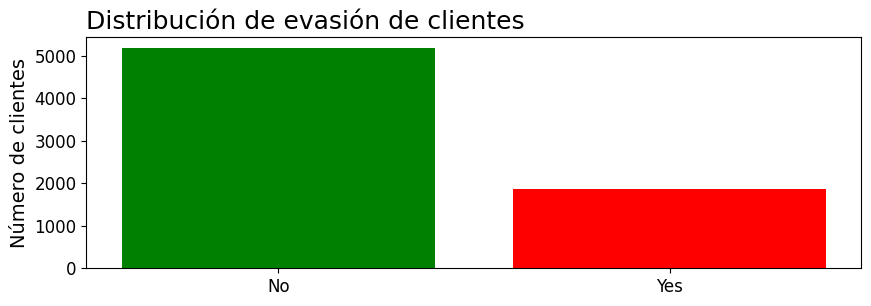

In [44]:
import matplotlib.pyplot as plt

# Contar valores de la columna churn
churn_counts = df['Churn'].value_counts()

# Opcional: colores personalizados
colores = ['green', 'red']  # No churn (No), Churn (Yes)

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 3))

# Gráfico de barras
ax.bar(churn_counts.index, churn_counts.values, color=colores)

# Título y etiquetas
ax.set_title('Distribución de evasión de clientes', loc='left', fontsize=18)
ax.set_xlabel('')
ax.set_ylabel('Número de clientes', fontsize=14)

# Tamaño de los textos de los ejes
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

# Mostrar el gráfico
plt.show()

## Recuento de evasión por variables categóricas

Ahora, exploraremos cómo se distribuye la **evasión** según variables categóricas, como **género, tipo de contrato, método de pago**, entre otras.

Este análisis puede revelar **patrones interesantes**, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a **orientar acciones estratégicas**.

In [45]:
df

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,estimated_daily_charge
0,0002-ORFBO,No,Female,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.19
1,0003-MKNFE,No,Male,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,0,0,13,1,0,DSL,1,0,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.84
7263,9992-RRAMN,Yes,Male,0,1,0,22,1,1,Fiber optic,0,0,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.84
7264,9992-UJOEL,No,Male,0,0,0,2,1,0,DSL,0,1,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,No,Male,0,1,1,67,1,0,DSL,1,0,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.26


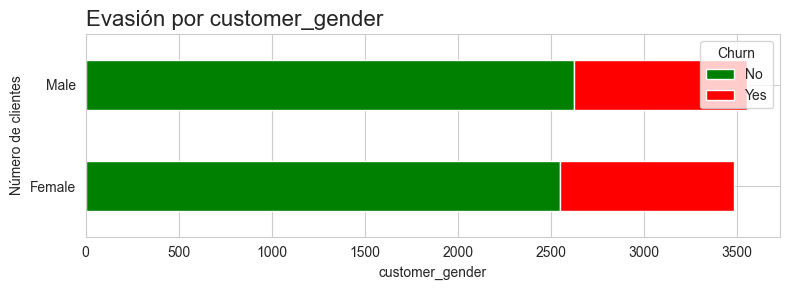

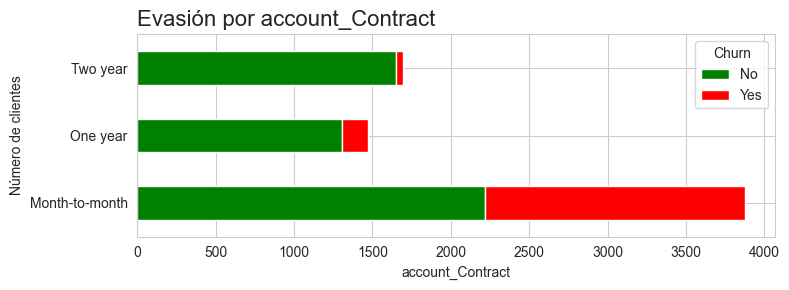

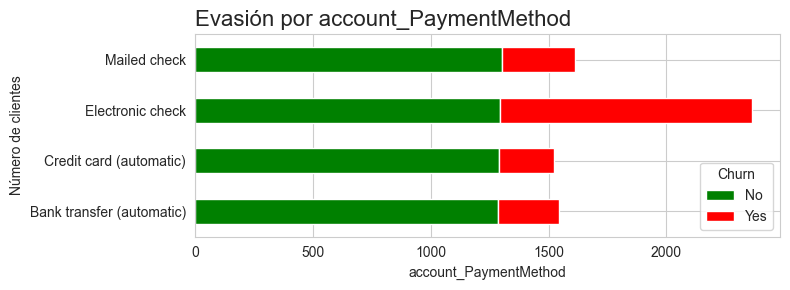

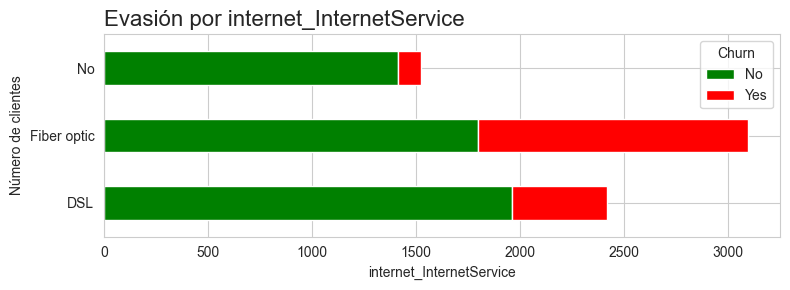

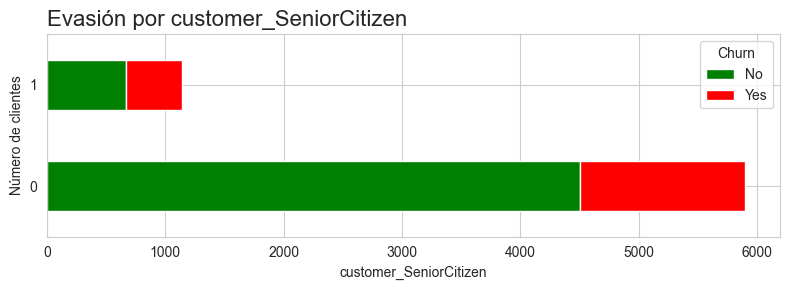

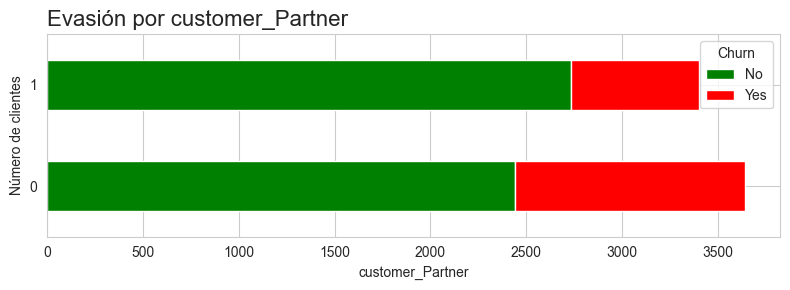

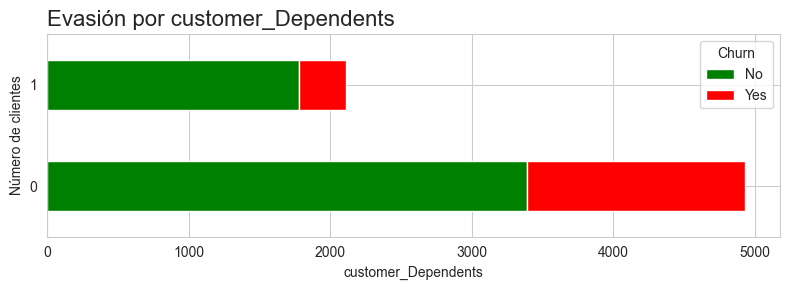

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de columnas categóricas que quieres analizar
columnas_categoricas = [
    'customer_gender',
    'account_Contract',
    'account_PaymentMethod',
    'internet_InternetService',
    'customer_SeniorCitizen',
    'customer_Partner',
    'customer_Dependents'
]

# Configurar estilo de seaborn (opcional, para que se vea bonito)
sns.set_style("whitegrid")

# Iterar sobre cada columna y graficar
for col in columnas_categoricas:
    # Crear tabla de contingencia: conteo de churn por categoría
    tabla = df.groupby([col, 'Churn']).size().unstack()

    # Crear figura y eje
    fig, ax = plt.subplots(figsize=(8, 3))

    # Gráfico de barras apiladas
    tabla.plot(kind='barh', stacked=True, ax=ax, color=['green', 'red'])

    # Personalización del gráfico
    ax.set_title(f'Evasión por {col}', loc='left', fontsize=16)
    ax.set_xlabel(col)
    ax.set_ylabel('Número de clientes')
    ax.legend(title='Churn', labels=['No', 'Yes'])
    ax.xaxis.set_tick_params(labelsize=10)
    ax.yaxis.set_tick_params(labelsize=10)
    plt.tight_layout()
    plt.show()

## Conteo de evasión por variables numéricas

En este paso, explora cómo las **variables numéricas**, como **"total gastado"** o **"tiempo de contrato"**, se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la **evasión**, proporcionando **insights** sobre los factores que influyen en el comportamiento de los clientes.

In [47]:
df.head(1)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,estimated_daily_charge
0,0002-ORFBO,No,Female,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.6,593.3,2.19


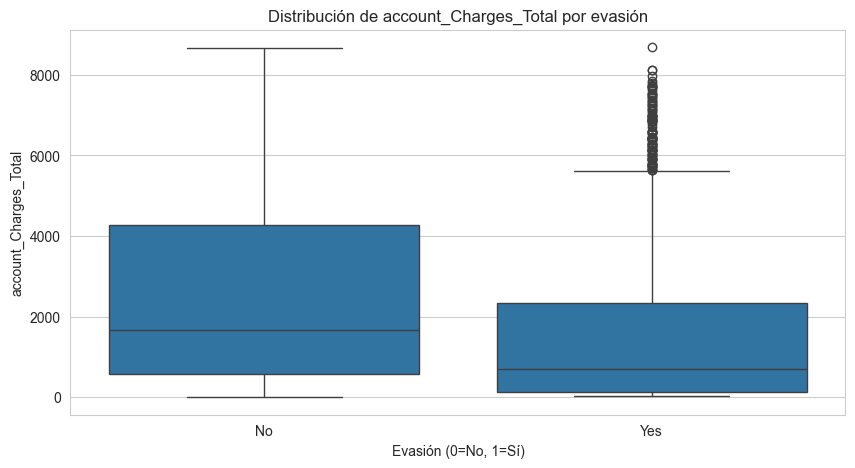

Promedio de account_Charges_Total por evasión:
Churn
No     2549.911442
Yes    1531.796094
Name: account_Charges_Total, dtype: float64




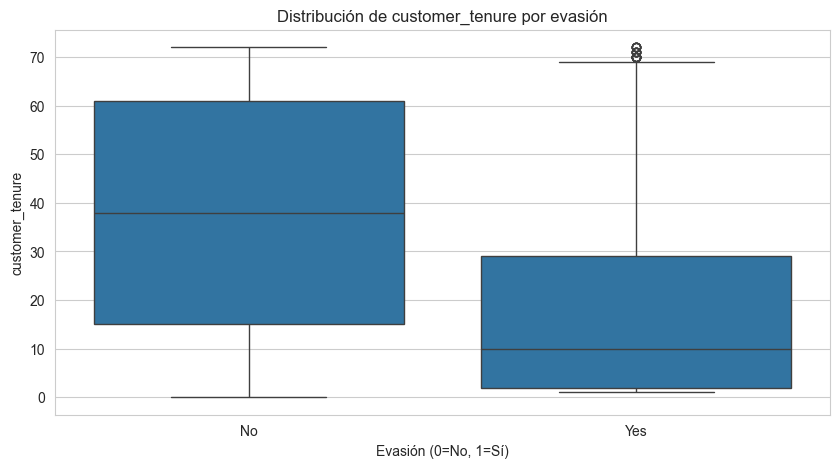

Promedio de customer_tenure por evasión:
Churn
No     37.569965
Yes    17.979133
Name: customer_tenure, dtype: float64




In [48]:
# Variables numéricas para analizar
variables_numericas = ['account_Charges_Total', 'customer_tenure']

# Para cada variable, hacer un análisis comparativo por evasión
for var in variables_numericas:
    plt.figure(figsize=(10,5))
    
    # Boxplot para comparar distribución entre evasión 0 y 1
    sns.boxplot(x='Churn', y=var, data=df)
    plt.title(f'Distribución de {var} por evasión')
    plt.xlabel('Evasión (0=No, 1=Sí)')
    plt.ylabel(var)
    plt.show()
    
    # También puedes ver el promedio
    promedio = df.groupby('Churn')[var].mean()
    print(f'Promedio de {var} por evasión:')
    print(promedio)
    print('\n')


In [49]:
df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,estimated_daily_charge
0,0002-ORFBO,No,Female,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


# 📄Informe final

## Informe análisis de evasión (Churn) de clientes

### 🔹 Introducción

El presente análisis tiene como objetivo entender los factores asociados con la evasión (o churn) de clientes en una empresa de servicios. La evasión de clientes representa una pérdida importante de ingresos y puede impactar la sostenibilidad del negocio. Analizaremos variables numéricas clave, como el tiempo que un cliente lleva con la empresa (customer_tenure), los cargos mensuales (account_Charges_Monthly), los cargos totales acumulados (account_Charges_Total) y el cargo diario estimado (estimated_daily_charge) para identificar diferencias entre clientes que cancelaron el servicio y los que permanecen activos.



### 🔹 Limpieza y Tratamiento de Datos

Se importó el dataset y se verificaron las columnas y tipos de datos. No se detectaron datos faltantes en las variables de interés. La variable objetivo Churn es categórica con valores "Yes" y "No". Se realizó la transformación necesaria para facilitar análisis y visualización.

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ver columnas y tipos
print(df.info())
print(df.head())

# Transformar variable objetivo a binaria para análisis (1=Yes, 0=No)
df['Churn_bin'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Revisar distribución de la variable objetivo
print(df['Churn'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer_gender            7043 non-null   object 
 3   customer_SeniorCitizen     7043 non-null   int64  
 4   customer_Partner           7043 non-null   int64  
 5   customer_Dependents        7043 non-null   int64  
 6   customer_tenure            7043 non-null   int64  
 7   phone_PhoneService         7043 non-null   int64  
 8   phone_MultipleLines        7043 non-null   int64  
 9   internet_InternetService   7043 non-null   object 
 10  internet_OnlineSecurity    7043 non-null   int64  
 11  internet_OnlineBackup      7043 non-null   int64  
 12  internet_DeviceProtection  7043 non-null   int64  
 13  internet_TechSupport       7043 non-null   int64  
 1

### 🔹 Análisis Exploratorio de Datos

Distribución de clientes que cancelaron y que no

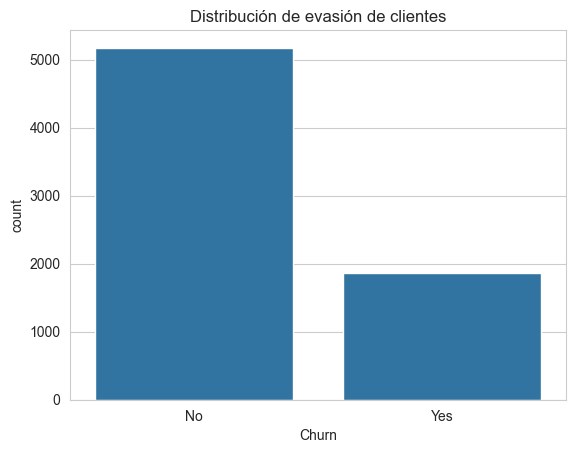

In [51]:
sns.countplot(x='Churn', data=df)
plt.title('Distribución de evasión de clientes')
plt.show()

Distribución de variables numéricas según evasión

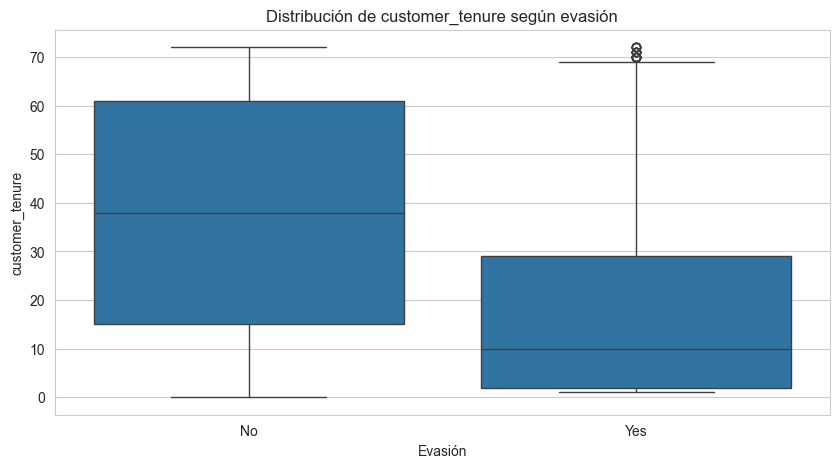

Promedio de customer_tenure por evasión:
Churn
No     37.569965
Yes    17.979133
Name: customer_tenure, dtype: float64



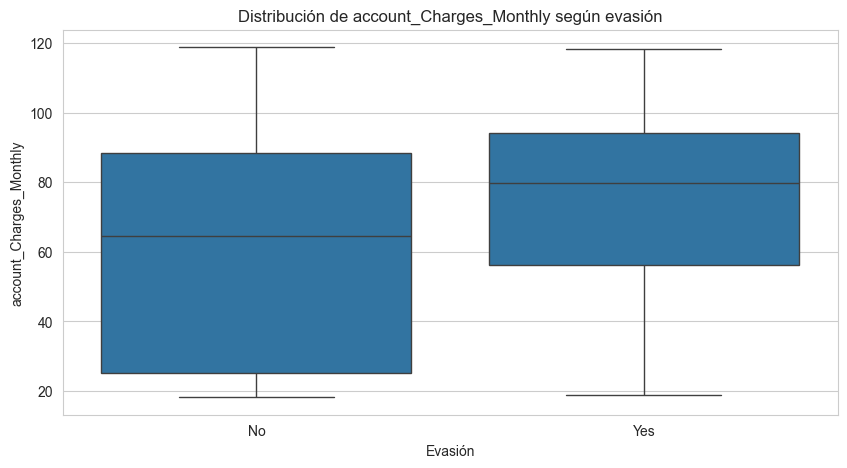

Promedio de account_Charges_Monthly por evasión:
Churn
No     61.265124
Yes    74.441332
Name: account_Charges_Monthly, dtype: float64



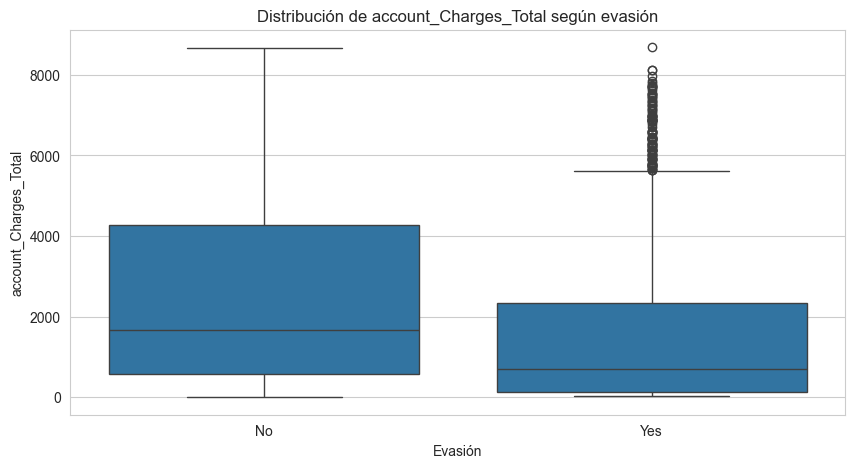

Promedio de account_Charges_Total por evasión:
Churn
No     2549.911442
Yes    1531.796094
Name: account_Charges_Total, dtype: float64



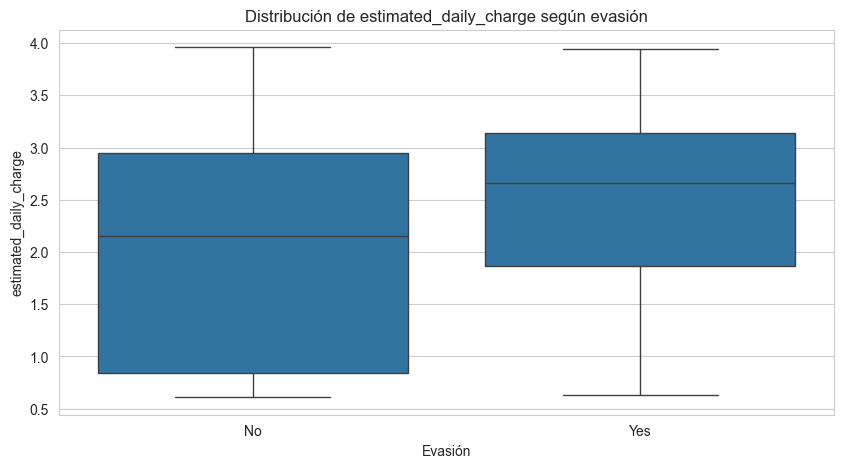

Promedio de estimated_daily_charge por evasión:
Churn
No     2.04208
Yes    2.48145
Name: estimated_daily_charge, dtype: float64



In [52]:
variables_numericas = ['customer_tenure', 'account_Charges_Monthly', 'account_Charges_Total', 'estimated_daily_charge']

for var in variables_numericas:
    plt.figure(figsize=(10,5))
    sns.boxplot(x='Churn', y=var, data=df)
    plt.title(f'Distribución de {var} según evasión')
    plt.xlabel('Evasión')
    plt.ylabel(var)
    plt.savefig(f'boxplot_{var}.png')
    plt.show()
    
    promedio = df.groupby('Churn')[var].mean()
    print(f'Promedio de {var} por evasión:\n{promedio}\n')

Análisis de correlación

In [53]:
# Correlación entre variables numéricas y la variable binaria Churn_bin
corr = df[variables_numericas + ['Churn_bin']].corr()
print(corr['Churn_bin'].sort_values(ascending=False))

Churn_bin                  1.000000
estimated_daily_charge     0.193412
account_Charges_Monthly    0.193356
account_Charges_Total     -0.198324
customer_tenure           -0.352229
Name: Churn_bin, dtype: float64


### 🔹 Conclusiones e Insights

Se observa que los clientes que cancelaron (Churn=Yes) tienden a tener menor tiempo de contrato (customer_tenure) que los que permanecen activos.

Los cargos mensuales (account_Charges_Monthly) y cargos totales (account_Charges_Total) son ligeramente mayores en clientes que no cancelaron.

El cargo diario estimado (estimated_daily_charge) también es menor en clientes que evadieron, lo que puede indicar menor consumo o servicio.

La correlación muestra que el tiempo con la empresa es la variable con mayor influencia negativa en la evasión, es decir, clientes nuevos tienen mayor riesgo de cancelar.

### 🔹 Recomendaciones

Implementar estrategias para fidelizar a clientes nuevos, como descuentos o mejoras en el servicio durante los primeros meses.

Revisar los cargos y planes ofrecidos para asegurar que los clientes perciban valor y no consideren cancelar.

Analizar más a fondo perfiles de clientes con bajo cargo diario para detectar necesidades no cubiertas.

Monitorear periódicamente estos indicadores para anticipar riesgos de evasión y actuar preventivamente.

In [54]:
df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,estimated_daily_charge,Churn_bin
0,0002-ORFBO,No,Female,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19,0
1,0003-MKNFE,No,Male,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00,0
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46,1
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27,1
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80,1


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer_gender            7043 non-null   object 
 3   customer_SeniorCitizen     7043 non-null   int64  
 4   customer_Partner           7043 non-null   int64  
 5   customer_Dependents        7043 non-null   int64  
 6   customer_tenure            7043 non-null   int64  
 7   phone_PhoneService         7043 non-null   int64  
 8   phone_MultipleLines        7043 non-null   int64  
 9   internet_InternetService   7043 non-null   object 
 10  internet_OnlineSecurity    7043 non-null   int64  
 11  internet_OnlineBackup      7043 non-null   int64  
 12  internet_DeviceProtection  7043 non-null   int64  
 13  internet_TechSupport       7043 non-null   int64  
 1

In [56]:
df.to_json("TelecomX_Data.json", orient="records", lines=False)